In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
from keras.utils import to_categorical

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


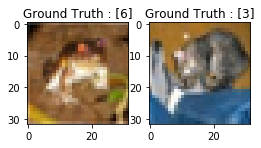

In [4]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))


In [5]:
# Find the shape of input images and create the variable input_shape
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [6]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


In [7]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

In [8]:
model1 = createModel()
batch_size = 256
epochs = 100
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
model1.evaluate(test_data, test_labels_one_hot)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s - loss: 2.0803 - acc: 0.2324 - val_loss: 1.7395 - val_acc: 0.3545
Epoch 2/100
50000/50000 [==============================] - 4s - loss: 1.7189 - acc: 0.3759 - val_loss: 1.4922 - val_acc: 0.4644
Epoch 3/100
50000/50000 [==============================] - 4s - loss: 1.5281 - acc: 0.4485 - val_loss: 1.4611 - val_acc: 0.4746
Epoch 4/100
50000/50000 [==============================] - 4s - loss: 1.3872 - acc: 0.5011 - val_loss: 1.3202 - val_acc: 0.5286
Epoch 5/100
50000/50000 [==============================] - 4s - loss: 1.2823 - acc: 0.5437 - val_loss: 1.1727 - val_acc: 0.5737
Epoch 6/100
50000/50000 [==============================] - 4s - loss: 1.1927 - acc: 0.5763 - val_loss: 1.1437 - val_acc: 0.5943
Epoch 7/100
50000/50000 [==============================] - 4s - loss: 1.1112 - acc: 0.6095 - val_loss: 0.9816 - val_acc: 0.6510
Epoch 8/100
50000/50000 [=============================

50000/50000 [==============================] - 4s - loss: 0.4483 - acc: 0.8475 - val_loss: 0.6259 - val_acc: 0.8081
Epoch 65/100
50000/50000 [==============================] - 4s - loss: 0.4508 - acc: 0.8464 - val_loss: 0.6614 - val_acc: 0.8037
Epoch 66/100
50000/50000 [==============================] - 4s - loss: 0.4555 - acc: 0.8442 - val_loss: 0.6367 - val_acc: 0.8102
Epoch 67/100
50000/50000 [==============================] - 4s - loss: 0.4491 - acc: 0.8485 - val_loss: 0.6539 - val_acc: 0.8048
Epoch 68/100
50000/50000 [==============================] - 4s - loss: 0.4512 - acc: 0.8461 - val_loss: 0.5964 - val_acc: 0.8157
Epoch 69/100
50000/50000 [==============================] - 4s - loss: 0.4494 - acc: 0.8482 - val_loss: 0.6722 - val_acc: 0.7982
Epoch 70/100
50000/50000 [==============================] - 4s - loss: 0.4508 - acc: 0.8477 - val_loss: 0.6469 - val_acc: 0.7956
Epoch 71/100
50000/50000 [==============================] - 4s - loss: 0.4529 - acc: 0.8457 - val_loss: 0.6122

[0.64486020488739015, 0.79730000000000001]

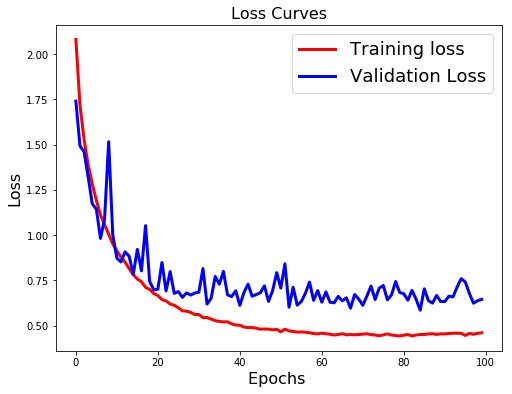

In [9]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

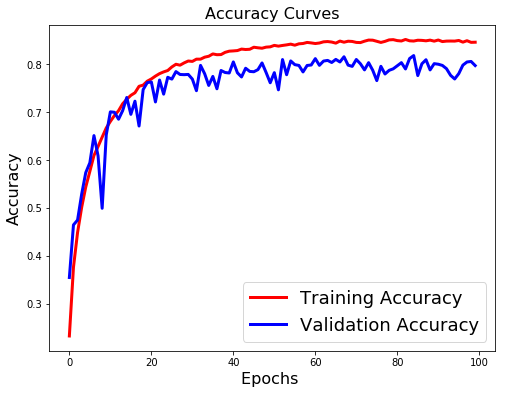

In [10]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

model2 = createModel()

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 256
epochs = 100
datagen = ImageDataGenerator(
#         zoom_range=0.2, # randomly zoom into images
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(train_data)

# Fit the model on the batches generated by datagen.flow().
history2 = model2.fit_generator(datagen.flow(train_data, train_labels_one_hot, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(train_data.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(test_data, test_labels_one_hot),
                              workers=4)

model2.evaluate(test_data, test_labels_one_hot)

Epoch 1/100
196/196 [==============================] - 12s - loss: 2.0773 - acc: 0.2300 - val_loss: 1.7590 - val_acc: 0.3570
Epoch 2/100
196/196 [==============================] - 12s - loss: 1.7591 - acc: 0.3580 - val_loss: 1.4942 - val_acc: 0.4588
Epoch 3/100
196/196 [==============================] - 13s - loss: 1.5939 - acc: 0.4199 - val_loss: 1.4636 - val_acc: 0.4642
Epoch 4/100
196/196 [==============================] - 12s - loss: 1.4612 - acc: 0.4707 - val_loss: 1.3348 - val_acc: 0.5231
Epoch 5/100
196/196 [==============================] - 13s - loss: 1.3650 - acc: 0.5094 - val_loss: 1.2044 - val_acc: 0.5645
Epoch 6/100
196/196 [==============================] - 13s - loss: 1.2859 - acc: 0.5401 - val_loss: 1.0988 - val_acc: 0.6088
Epoch 7/100
196/196 [==============================] - 12s - loss: 1.2014 - acc: 0.5716 - val_loss: 1.0460 - val_acc: 0.6265
Epoch 8/100
196/196 [==============================] - 13s - loss: 1.1407 - acc: 0.5959 - val_loss: 1.0120 - val_acc: 0.6419


196/196 [==============================] - 11s - loss: 0.6076 - acc: 0.7973 - val_loss: 0.5329 - val_acc: 0.8198
Epoch 67/100
196/196 [==============================] - 12s - loss: 0.6074 - acc: 0.7977 - val_loss: 0.5331 - val_acc: 0.8216
Epoch 68/100
196/196 [==============================] - 12s - loss: 0.6033 - acc: 0.7991 - val_loss: 0.5170 - val_acc: 0.8296
Epoch 69/100
196/196 [==============================] - 11s - loss: 0.6045 - acc: 0.7976 - val_loss: 0.5604 - val_acc: 0.8082
Epoch 70/100
196/196 [==============================] - 12s - loss: 0.6066 - acc: 0.7979 - val_loss: 0.5481 - val_acc: 0.8175
Epoch 71/100
196/196 [==============================] - 12s - loss: 0.6108 - acc: 0.7980 - val_loss: 0.5240 - val_acc: 0.8213
Epoch 72/100
196/196 [==============================] - 12s - loss: 0.6086 - acc: 0.7966 - val_loss: 0.5395 - val_acc: 0.8218
Epoch 73/100
196/196 [==============================] - 13s - loss: 0.6021 - acc: 0.7991 - val_loss: 0.6090 - val_acc: 0.8000
Epoch

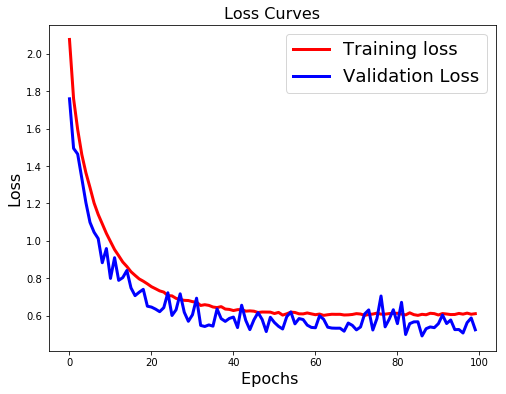

In [12]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

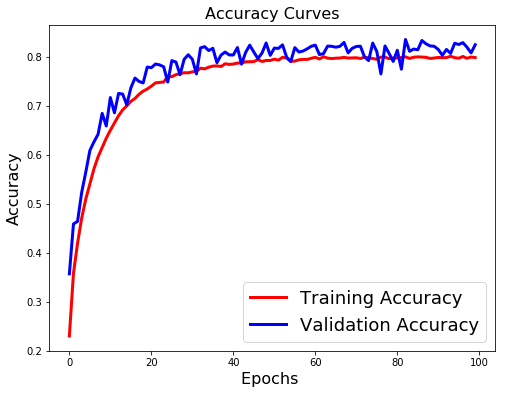

In [13]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['acc'],'r',linewidth=3.0)
plt.plot(history2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)